In [1]:
# import the user dataset, for which each observation is a user who was approved for a life insurance product
# some of the users purchased and some did not - this is the target variable

import pandas as pd
user = pd.read_csv(r'C:\Users\milan\Documents\GitHub\DSC-630-Project\Propensity.csv')
user.head()

C:\Users\milan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20,21,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,application_id,bind_date,open_to_submit_min,submit_to_approve_min,channel_combined,business_line,open_date,bind,pre_approval_interactions,post_approval_pre_bind_interactions,...,travel_countries_count,med_conditions_count,bmi,age,income,annual_premium_estimated,income_comb,income_grp_v1,income_grp_v2,income_prem_ratio
0,cc3090db-2ed8-4fc5-8f66-f3ef8bfef12b,2021-08-01,5,2,Lemonade,protect,2021-07-24,1,0,0,...,NaN,1.0,26.58,57.53,360000.0,1112.04,360000.0,$100k+,over $50k,323.729362
1,9bffeb0e-bf7d-4544-a175-df737563b530,NaN,4,2,Lemonade,protect,2021-08-12,0,0,0,...,NaN,1.0,33.90,41.32,57000.0,NaN,57000.0,$50k-$100k,over $50k,NaN
2,38c5539f-aa55-406f-8356-91859e67502a,NaN,0,2,Lemonade,protect,2021-08-22,0,0,0,...,NaN,1.0,22.96,39.60,84000.0,NaN,84000.0,$50k-$100k,over $50k,NaN
3,ea0c0f26-b08a-4121-92b4-04b36ac16442,2021-08-10,4,2,Lemonade,protect,2021-08-10,1,0,0,...,NaN,1.0,34.17,41.93,245000.0,2541.96,245000.0,$100k+,over $50k,96.382319
4,0a40356d-aaa0-4aaa-9bbd-5f0f0534608c,NaN,9,1,Lemonade,protect,2021-12-04,0,0,0,...,NaN,1.0,37.12,42.82,78500.0,NaN,78500.0,$50k-$100k,over $50k,NaN


In [2]:
user.shape

(127691, 61)

In [3]:
# import the quote dataset, where each observation is an application id that includes the premiums that a user was shown 
# at quote and after being approved for the same product and face value, which is not always the same
# in fact, a previous analysis showed that more than half the time the premium the user is shown after 
# having their application approved is higher than the one they they were shown when they got a quote

# a key question to be answered in this model is the importance of this feature

quote = pd.read_csv(r'C:\Users\milan\Documents\GitHub\DSC-630-Project\quote_to_approved.csv')
quote.head()

,created_at,business_line,quote_id,application_id,face_amount,product,quoted_risk_class,approved_risk_class,quoted_premium,approved_premium,premium_difference,premium_pct_diff
0,2019-10-27,direct,47386ebc-4405-40ca-b2c1-79b24a537e97,844a2118-1c9e-4f50-86ed-970937f8ecfc,200000,BT2002,select_tb,select_nt,5.0,33.33,-28.33,-5.666
1,2022-04-11,direct,ee741da6-788e-41cb-8b23-ab23bf07fecc,e3f51c27-eba2-4f36-86d2-f204baf66455,50000,BT1004,elite_nt,elite_nt,7.5,7.50,0.00,0.000
2,2021-10-26,direct,f05908fa-25df-4219-89fb-b30f2bb517a3,8cf1757c-f644-4082-a0bb-8b3ecb50d79b,50000,BT1004,elite_nt,elite_nt,7.5,7.50,0.00,0.000
3,2021-04-28,direct,4e8cf39c-5334-451f-8770-d3de35d1b4ea,42c460b7-3d17-4c27-8f11-535b5da44d2f,50000,BT1004,elite_nt,super_elite_nt,7.5,7.50,0.00,0.000
4,2021-04-19,advisor,e573f1be-9ed2-4ff9-8597-20859417cad0,7145a861-c133-4330-918b-80d4199078ca,50000,BT1004,elite_nt,super_elite_nt,7.5,7.50,0.00,0.000


In [4]:
quote.shape

(101416, 12)

In [5]:
# the user dataframe has ~127k observations
# the quote dataframe has ~101k observations
# about 45k observationa are in both dataframes

df = pd.merge(user, quote, on = ['application_id'])
df.shape

(44844, 72)

In [6]:
# check the bind field as it is our target
df['bind'].unique()

array([0, 1], dtype=int64)

In [7]:
df['bind'].isnull().sum()

0

In [8]:
df.groupby('bind')['application_id'].count().reset_index()

,bind,application_id
0,0,25607
1,1,19237


Possible values for bind (which means that the user purchased a policy) are 0 and 1, where 0 means that they did not bind.  There are no null values, and the dataset, while not perfectly balanced, is not unbalanced, with about 56% of users not binding and 44% binding.

In [9]:
# list the columns and create a data dictionary
df.columns

Index(['application_id', 'bind_date', 'open_to_submit_min',
       'submit_to_approve_min', 'channel_combined', 'business_line_x',
       'open_date', 'bind', 'pre_approval_interactions',
       'post_approval_pre_bind_interactions', 'post_bind_interactions',
       'total_interactions', 'anonid_uniq', 'sessions_uniq', 'event_total',
       'session_pageload_total', 'url_uniq', 'total_seconds', 'gclid_count',
       'customer_portal_loads', 'device', 'device_name',
       'avg_seconds_per_session', 'avg_events_per_session', 'event_len',
       'utm_source_len', 'utm_medium_len', 'utm_campaign_len', 'utm_term_len',
       'referrer_host_len', 'record_created_at', 'gender', 'tb',
       'mvr_order_status', 'current_ins', 'rx_result', 'replacement_ins',
       'legal_resident', 'employment_status', 'postal_code_address',
       'income_payment_period', 'designate_secondary_contact',
       'alcohol_weekly', 'disability_pmts', 'term_length_years',
       'household_income', 'lrc_score', 'f

### Data Dictionary

#### From user
- application_id: categorical, unique identifier of the application
- bind_date: date, the date of when the applicant bound a policy (needs to be removed from model to avoid leakage)
- open_to_submit_min: integer, number of minutes to complete and submit the application
- submit_to_approve_min: integer, number of minutes for the application to get approved after it is submitted
- channel_combined: categorical, marketing channel(s) responsible for the application start ?  or the quote?  or something else?
- business_line: categorical, direct, protect, core, advisors
- open_date: date, the date the application was started
- bind: binary, indicating if the applicant bound a policy (target variable)
- anonid_uniq: number of anonymous id's from segment
- sessions_uniq: number of unique sessions
- event_total: number of events
- session_pageload_total: number of session page loads
- url_uniq: number of unique url's accessed by the user
- total_seconds:  how long on the web site
- gclid_count: ?
- customer_portal_loads: ?
- device: device type, i.e., phone, tablet, desktop
- device_name: device type + OS
- avg_seconds_per_session: average time per session in second
- avg_events_per_session: average number of events per session
- event_len: average number of seconds per event
- gender: gender of applicant
- tb: binary, tobacco user or not
- current_ins: binary, does the applicant currently have life insurance
- rx_result: (remove)
- replacement_ins: binary, does the applicant currently have replacement insurance (what is replacement insurance?)
- legal_resident: resident or visa
- employment_status:  'fulltime', 'parttime', 'fulltime_student', 'retired','stay_at_home', 'parttime_student', 'unemployed'
- postal_code_address: zip code of home address
- income_payment_period: how frequently the applicant gets paid
- designate_secondary_contact:  no non-null values, so this can be removed
- alcohol_weekly: number of drinks per week as reported by the applicant
- disability_pmts: binary, does (or has?) the applicant receive(d) diability payments (history)
- term_length_years: length of term (this will likely be removed, but compare to term length from quote)
- household_income: reported household income (verify)
- lrc_score: brought in from vendor risk score from lexus nexes, mortality risk score.  This generally highly correlated with being approved
- face_value: face value of the policy (this will likely be removed, but compare to face value from quote)
- previous_declined: binary, has the applicant been previously declined for life insurance
- travel_countries_count: number of countries the applicant has visited
- med_conditions_count: number of medical conditions the applicant has history
- bmi: body mass index of applicant
- age: age of applicant
- income: income of applicant
- annual_premium_estimated: the annual premium shown to the applicant after approval (this will likely be removed, but compare to premium from quote)
- income_comb: annual income
- income_prem_ratio: rato of income to premium (annual)
    - Note: add income to face amount ratio as another feature
    
#### From quote
- created_at: when the application was started
- business_line_y: business line, join on this 
- quote_id: quote id associated with the approved app
- face_amount: face amount of the approved policy
- product: procuct code, including term length
- quoted_risk_class: the risk class that the applicant was put it at quote
- approved_risk_class: the risk class the applicant was put it after approval
- quoted_premium: the monthly premium shown at quote
- approved_premium: the monthly premium shown after approval
- premium_difference: the difference between the two premiums (quote - approved)
- premium_pct_diff: the percent difference between the two premiums (quote - approved)/quote

#### After discussing with the data science team, the following fields can be removed
- the following two field should be removed to avoid leakage
    - post_bind_interactions:
    - total_interactions: sum of the previous three fields (inlcuding post bind interactions)
- utm_source_len: not sure how the length of the various parts of the utm is relevant to predicting bind
- utm_medium_len
- utm_campaign_len
- utm_term_len
- referrer_host_len
- record_created_at: when the data was pulled
- mvr_points
- mvr_order_status
- zip_d1
- income_grp_v1: binned income group: under 50k, 50k-100k, 100k+ 
- income_grp_v2: binned income group; under 50k, 50k+

In [10]:
# remove the fields noted above
df = df[['application_id', 'open_to_submit_min',
       'submit_to_approve_min', 'channel_combined', 'business_line_x',
       'open_date', 'bind', 'pre_approval_interactions',
       'post_approval_pre_bind_interactions', 'anonid_uniq', 'sessions_uniq', 'event_total',
       'session_pageload_total', 'url_uniq', 'total_seconds', 'gclid_count',
       'customer_portal_loads', 'device', 'device_name',
       'avg_seconds_per_session', 'avg_events_per_session', 'event_len', 'gender', 'tb', 'current_ins', 'rx_result', 'replacement_ins',
       'legal_resident', 'employment_status', 'postal_code_address',
       'income_payment_period',
       'alcohol_weekly', 'disability_pmts', 'term_length_years',
       'household_income', 'lrc_score', 'face_value',
       'previous_declined', 'travel_countries_count',
       'med_conditions_count', 'bmi', 'age', 'income',
       'annual_premium_estimated', 'income_comb', 'income_prem_ratio', 'created_at', 'business_line_y',
       'quote_id', 'face_amount', 'product', 'quoted_risk_class',
       'approved_risk_class', 'quoted_premium', 'approved_premium',
       'premium_difference', 'premium_pct_diff']]

### Data Cleaning

#### Check how income to premium ratio is defined (DS did not know for sure)
We want to verify which fields are used to create this field.  The hypothesis is that it is income_comb and annual_premium_estimated

In [11]:
# check the number of nulls for income_comb
df['income_comb'].isnull().sum()

6369

In [12]:
# to check our hypothesis, I will create a column for annual income divided by annual premium and compare it to
# the values in the income_prem_ratio field
test = df[[ 'income_comb', 'annual_premium_estimated', 'income_prem_ratio']]
test['income_ratio'] = test.apply(lambda x: x.income_comb/x.annual_premium_estimated, axis=1)

C:\Users\milan\AppData\Local\Temp/ipykernel_1580/3456382564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['income_ratio'] = test.apply(lambda x: x.income_comb/x.annual_premium_estimated, axis=1)


In [13]:
test

,income_comb,annual_premium_estimated,income_prem_ratio,income_ratio
0,182000.0,NaN,NaN,NaN
1,52650.0,362.04,145.425920,145.425920
2,38584.0,302.04,127.744670,127.744670
3,55200.0,NaN,NaN,NaN
4,78864.0,NaN,NaN,NaN
...,...,...,...,...
44839,85000.0,NaN,NaN,NaN
44840,85000.0,1412.04,60.196595,60.196595
44841,85000.0,649.56,130.857811,130.857811
44842,85000.0,1368.00,62.134503,62.134503


In [14]:
#  drop NaN and check the remaining values
test = test.dropna(subset = ['annual_premium_estimated']).reset_index()
test.shape

(19237, 5)

In [15]:
test[test['income_prem_ratio'] != test['income_ratio']]
# this should show observations where these fields are different, but they look the same

,index,income_comb,annual_premium_estimated,income_prem_ratio,income_ratio
5,12,160000.0,1362.00,117.474302,117.474302
18,38,37960.0,402.00,94.427861,94.427861
21,44,50400.0,942.00,53.503185,53.503185
29,65,1768000.0,2613.00,676.616915,676.616915
33,76,50388.0,435.00,115.834483,115.834483
...,...,...,...,...,...
19220,44818,85000.0,852.00,99.765258,99.765258
19223,44822,85000.0,932.04,91.197803,91.197803
19228,44827,85000.0,279.48,304.136253,304.136253
19232,44833,85000.0,423.96,200.490612,200.490612


In [16]:
# find the difference between the fields and sum it to see how different they are
test['diff'] = test.apply(lambda x: x.income_prem_ratio - x.income_ratio, axis =1)
test['diff'].sum()

-2.3276852559143968e-11

The difference is essentially 0, which confirms that this is how income_prem_ratio is calculated

#### Check to see how premium, face value, and term length compare between the two datasets that were combined

In [17]:
# first create a new dataframe with the fields that I want to compare

compare = df[['annual_premium_estimated', 'approved_premium', 'face_value', 'face_amount', 'term_length_years', 'product']]
# the approved premium is a monthly premium, so we multiply by 12 to convert it to annual
compare['annual_approved_premium'] = compare.apply(lambda x: x.approved_premium*12, axis = 1)

C:\Users\milan\AppData\Local\Temp/ipykernel_1580/3800254461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['annual_approved_premium'] = compare.apply(lambda x: x.approved_premium*12, axis = 1)


In [18]:
# extract the term length from the product
# for example , if the product is BT2004, the term length is 20, so we need to extract the middle two characters
# and convert it to an integer to compare with term length
compare['approved_term'] = compare['product'].str[:4].str[-2:].astype(int)

C:\Users\milan\AppData\Local\Temp/ipykernel_1580/1808066344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['approved_term'] = compare['product'].str[:4].str[-2:].astype(int)


In [19]:
# examine the number of null values for each of these fields
compare = compare[['annual_premium_estimated', 'annual_approved_premium', 'face_value',
       'face_amount', 'term_length_years', 'approved_term']]
compare.isnull().sum()

annual_premium_estimated    25607
annual_approved_premium         0
face_value                  15285
face_amount                     0
term_length_years               0
approved_term                   0
dtype: int64

We see that the annual premium estimated is missing more than 25k observations, and face value is missing over 15k.  We will still check to see how the remaining values compare, but will use annual_approved_premium and face amount for our model.  The data science team has confirmed that these fields from the user dataframe are likely less reliable

In [20]:
# create a difference field for each of these fields
# create a percent difference field for premium to get a sense for how far off these values are
# since face value and term length are really categorical, a percent difference doesn't make sense
compare['prem_diff'] = compare.apply(lambda x: abs(x.annual_premium_estimated - x.annual_approved_premium)/x.annual_approved_premium*100, axis=1)
compare['face_diff'] = compare.apply(lambda x: abs(x.face_value - x.face_amount)/x.face_amount*100, axis=1)
compare['term_diff'] = compare.apply(lambda x: abs(x.term_length_years - x.approved_term), axis=1)
compare['prem_pct_diff'] = compare.apply(lambda x: abs(x.annual_premium_estimated - x.annual_approved_premium)/x.annual_approved_premium*100, axis=1)
compare.head(100)

,annual_premium_estimated,annual_approved_premium,face_value,face_amount,term_length_years,approved_term,prem_diff,face_diff,term_diff,prem_pct_diff
0,NaN,4832.04,NaN,1000000,20,20,NaN,NaN,0.0,NaN
1,362.04,477.96,500000.0,700000,15,15,24.253076,28.571429,0.0,24.253076
2,302.04,302.04,500000.0,500000,20,20,0.000000,0.000000,0.0,0.000000
3,NaN,1017.00,NaN,750000,30,30,NaN,NaN,0.0,NaN
4,NaN,989.04,700000.0,700000,30,30,NaN,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
95,132.96,132.96,50000.0,50000,10,10,0.000000,0.000000,0.0,0.000000
96,1247.04,1247.04,500000.0,500000,10,10,0.000000,0.000000,0.0,0.000000
97,NaN,591.00,50000.0,50000,20,20,NaN,0.000000,0.0,NaN
98,NaN,992.04,500000.0,500000,30,30,NaN,0.000000,0.0,NaN


#### Summarize how much these fields differ between the two dataframes

#### Premium

In [21]:
# 71% of observations differ for premium
compare[(compare['prem_diff']!=0)].shape[0]/compare.shape[0]

0.7082775845152083

In [22]:
# the mean absolute percent difference in premium is about 10%
compare['prem_pct_diff'].mean()

10.218040045733458

#### Face value

In [23]:
# About 50% of observations differ for face value
compare[(compare['face_diff']!=0)].shape[0]/compare.shape[0]

0.5035233253055035

#### Term length

In [24]:
# term length agrees for every observation
compare[(compare['term_diff']!=0)].shape[0]/compare.shape[0]

0.0

Due both to the large number of missing values, and more importantly discussions with the data science team about these fields, we will use the fields that come from the quote dataset

In [25]:
df.columns

Index(['application_id', 'open_to_submit_min', 'submit_to_approve_min',
       'channel_combined', 'business_line_x', 'open_date', 'bind',
       'pre_approval_interactions', 'post_approval_pre_bind_interactions',
       'anonid_uniq', 'sessions_uniq', 'event_total', 'session_pageload_total',
       'url_uniq', 'total_seconds', 'gclid_count', 'customer_portal_loads',
       'device', 'device_name', 'avg_seconds_per_session',
       'avg_events_per_session', 'event_len', 'gender', 'tb', 'current_ins',
       'rx_result', 'replacement_ins', 'legal_resident', 'employment_status',
       'postal_code_address', 'income_payment_period', 'alcohol_weekly',
       'disability_pmts', 'term_length_years', 'household_income', 'lrc_score',
       'face_value', 'previous_declined', 'travel_countries_count',
       'med_conditions_count', 'bmi', 'age', 'income',
       'annual_premium_estimated', 'income_comb', 'income_prem_ratio',
       'created_at', 'business_line_y', 'quote_id', 'face_amount', 'p

In [26]:
df = df[['application_id', 'open_to_submit_min', 'submit_to_approve_min',
       'channel_combined', 'business_line_x', 'open_date', 'bind',
       'pre_approval_interactions', 'post_approval_pre_bind_interactions',
       'anonid_uniq', 'sessions_uniq', 'event_total', 'session_pageload_total',
       'url_uniq', 'total_seconds', 'gclid_count', 'customer_portal_loads',
       'device', 'device_name', 'avg_seconds_per_session',
       'avg_events_per_session', 'event_len', 'gender', 'tb', 'current_ins',
       'rx_result', 'replacement_ins', 'legal_resident', 'employment_status',
       'postal_code_address', 'income_payment_period', 'alcohol_weekly',
       'disability_pmts', 'household_income', 'lrc_score',
       'previous_declined', 'travel_countries_count',
       'med_conditions_count', 'bmi', 'age', 'income',
        'income_comb',
       'created_at', 'business_line_y', 'quote_id', 'face_amount', 'product',
       'quoted_risk_class', 'approved_risk_class', 'quoted_premium',
       'approved_premium', 'premium_difference', 'premium_pct_diff']]

In [27]:
# add annual approved premium, face amount to premium ratio, and income to premium ratio
df['annual_approved_premium'] = df.apply(lambda x: x.approved_premium*12, axis = 1)
df['face_prem_ratio'] = df.apply(lambda x: x.face_amount/x.annual_approved_premium, axis = 1)
df['income_prem_ratio'] = df.apply(lambda x: x.income_comb/x.annual_approved_premium, axis = 1)

#### Quick check of how premium difference is distributed for this sample

In [28]:
# about 60% of users saw an increase in premium from quote to approved (premium difference = quote - approved)
df[df['premium_difference'] < 0].shape[0]/df.shape[0]

0.6004593702613504

In [29]:
# the average premium change was an increase of about $30
df['premium_difference'].mean()

-30.194834537507667

In [30]:
# the average premium percent change was 56%
df['premium_pct_diff'].mean()

-0.5604121070288857

These numbers are comparable to previous analysis on a larger sample of about 100k observation, suggesting that our sample of 45k observations is representative with respect to this dimension

In [31]:
df.columns

Index(['application_id', 'open_to_submit_min', 'submit_to_approve_min',
       'channel_combined', 'business_line_x', 'open_date', 'bind',
       'pre_approval_interactions', 'post_approval_pre_bind_interactions',
       'anonid_uniq', 'sessions_uniq', 'event_total', 'session_pageload_total',
       'url_uniq', 'total_seconds', 'gclid_count', 'customer_portal_loads',
       'device', 'device_name', 'avg_seconds_per_session',
       'avg_events_per_session', 'event_len', 'gender', 'tb', 'current_ins',
       'rx_result', 'replacement_ins', 'legal_resident', 'employment_status',
       'postal_code_address', 'income_payment_period', 'alcohol_weekly',
       'disability_pmts', 'household_income', 'lrc_score', 'previous_declined',
       'travel_countries_count', 'med_conditions_count', 'bmi', 'age',
       'income', 'income_comb', 'created_at', 'business_line_y', 'quote_id',
       'face_amount', 'product', 'quoted_risk_class', 'approved_risk_class',
       'quoted_premium', 'approved_pre

In [32]:
# check business line from user against quote
biz = df[['application_id', 'business_line_x', 'business_line_y']]
print(biz.isna().sum())
biz['agree'] = biz.apply(lambda x: 'yes' if x.business_line_x == x.business_line_y else 'no', axis=1)
biz[biz['agree'] == 'yes'].shape[0]/biz.shape[0]

application_id     0
business_line_x    0
business_line_y    0
dtype: int64


C:\Users\milan\AppData\Local\Temp/ipykernel_1580/3273836690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz['agree'] = biz.apply(lambda x: 'yes' if x.business_line_x == x.business_line_y else 'no', axis=1)


0.9363348497011863

In [33]:
# business line agrees for 93% of observations (with no missing values).  We will use the business line from quote 
# as that generally seems to be the more reliable data
df.drop(columns = 'business_line_x', axis=1, inplace=True)
df.rename(columns = {'business_line_y':'business_line'}, inplace=True)
df.columns

Index(['application_id', 'open_to_submit_min', 'submit_to_approve_min',
       'channel_combined', 'open_date', 'bind', 'pre_approval_interactions',
       'post_approval_pre_bind_interactions', 'anonid_uniq', 'sessions_uniq',
       'event_total', 'session_pageload_total', 'url_uniq', 'total_seconds',
       'gclid_count', 'customer_portal_loads', 'device', 'device_name',
       'avg_seconds_per_session', 'avg_events_per_session', 'event_len',
       'gender', 'tb', 'current_ins', 'rx_result', 'replacement_ins',
       'legal_resident', 'employment_status', 'postal_code_address',
       'income_payment_period', 'alcohol_weekly', 'disability_pmts',
       'household_income', 'lrc_score', 'previous_declined',
       'travel_countries_count', 'med_conditions_count', 'bmi', 'age',
       'income', 'income_comb', 'created_at', 'business_line', 'quote_id',
       'face_amount', 'product', 'quoted_risk_class', 'approved_risk_class',
       'quoted_premium', 'approved_premium', 'premium_diffe

In [34]:
# dropping a few more columns until I have a chance to understand what they represent
df.drop(['gclid_count', 'customer_portal_loads'], axis=1, inplace=True)
df.shape

(44844, 53)

In [35]:
# check for missing values
df.isna().sum()

application_id                             0
open_to_submit_min                         0
submit_to_approve_min                      0
channel_combined                           0
open_date                                  0
bind                                       0
pre_approval_interactions                  0
post_approval_pre_bind_interactions        0
anonid_uniq                             2943
sessions_uniq                           2943
event_total                             2943
session_pageload_total                  2943
url_uniq                                2943
total_seconds                           2943
device                                  2943
device_name                             2943
avg_seconds_per_session                 2943
avg_events_per_session                  2943
event_len                               2943
gender                                     0
tb                                         0
current_ins                                0
rx_result 

In [36]:
# there are three income variables, how do they differ and should we keep more than one?
income = df[['household_income', 'income', 'income_comb']]
income[income['household_income'].notna()]

,household_income,income,income_comb
29,68000.0,57200.0,57200.0
40,31200.0,27690.0,27690.0
53,124000.0,124000.0,124000.0
68,100000.0,88040.0,88040.0
109,140000.0,33384.0,33384.0
...,...,...,...
44717,125000.0,85000.0,85000.0
44796,85000.0,NaN,85000.0
44805,85000.0,85000.0,85000.0
44822,85000.0,85000.0,85000.0


In [37]:
income['agree'] = income.apply(lambda x: x.income - x.income_comb, axis=1)
print(income['agree'].max())
print(income['agree'].mean())
print(income['agree'].median())

0.0
0.0
0.0


C:\Users\milan\AppData\Local\Temp/ipykernel_1580/1703985764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income['agree'] = income.apply(lambda x: x.income - x.income_comb, axis=1)


'income' and 'income_comb' seem to always agree, but income_comb has fewer missing values.  'household_income' has very few values that are not missing and seems to differ from the the other two income fields.  We will retain income_comb

In [38]:
df.drop(columns = ['household_income', 'income'], inplace=True)

There are three variables with more than 36k missing values.  We explore those below.

In [39]:
df['replacement_ins'].unique()

array([nan, 'no', 'yes'], dtype=object)

In [40]:
df.groupby('replacement_ins')['application_id'].count().reset_index()

,replacement_ins,application_id
0,no,6791
1,yes,1132


In [41]:
ins = df.groupby(['replacement_ins', 'bind'])['application_id'].count().reset_index()

Text(0, 0.5, 'Count of Users')

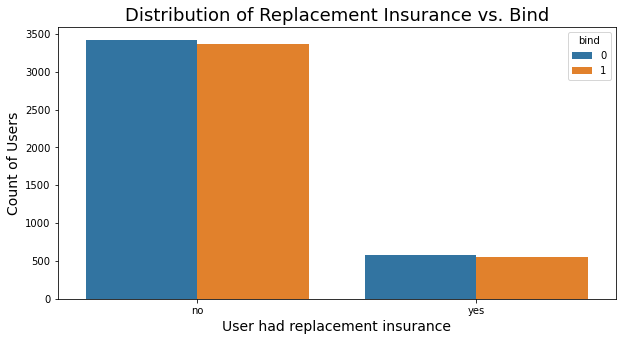

In [45]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data = ins, x = 'replacement_ins', y = 'application_id', hue='bind')
plt.title('Distribution of Replacement Insurance vs. Bind', size = 18)
plt.xlabel('User had replacement insurance', size = 14)
plt.ylabel('Count of Users', size = 14)

In [46]:
df['legal_resident'].unique()

array([nan, 'resident', 'visa'], dtype=object)

In [47]:
df.groupby('legal_resident')['application_id'].count().reset_index()

,legal_resident,application_id
0,resident,1905
1,visa,273


In [48]:
df.groupby(['legal_resident', 'bind'])['application_id'].count().reset_index()

,legal_resident,bind,application_id
0,resident,0,1081
1,resident,1,824
2,visa,0,135
3,visa,1,138


In [49]:
df['travel_countries_count'].unique()

array([nan,  1.,  2.,  3.,  4.,  6.,  5.,  9.])

In [50]:
df.groupby(['travel_countries_count'])['application_id'].count().reset_index()

,travel_countries_count,application_id
0,1.0,1868
1,2.0,196
2,3.0,88
3,4.0,25
4,5.0,6
5,6.0,4
6,9.0,1


In [51]:
df.groupby(['travel_countries_count', 'bind'])['application_id'].count().reset_index()

,travel_countries_count,bind,application_id
0,1.0,0,1006
1,1.0,1,862
2,2.0,0,93
3,2.0,1,103
4,3.0,0,36
5,3.0,1,52
6,4.0,0,13
7,4.0,1,12
8,5.0,0,3
9,5.0,1,3


In [52]:
print(df['travel_countries_count'].corr(df['bind']))

0.052193399358904616


None of these variables seems to be very correlated with the target, and including variables with so many missing values could negatively impact the ability of the model to make accurate predictions on new data, so we will leave them out for now.

In [53]:
df.drop(columns = ['travel_countries_count', 'replacement_ins', 'legal_resident'], axis=1, inplace = True)

In [54]:
df.columns

Index(['application_id', 'open_to_submit_min', 'submit_to_approve_min',
       'channel_combined', 'open_date', 'bind', 'pre_approval_interactions',
       'post_approval_pre_bind_interactions', 'anonid_uniq', 'sessions_uniq',
       'event_total', 'session_pageload_total', 'url_uniq', 'total_seconds',
       'device', 'device_name', 'avg_seconds_per_session',
       'avg_events_per_session', 'event_len', 'gender', 'tb', 'current_ins',
       'rx_result', 'employment_status', 'postal_code_address',
       'income_payment_period', 'alcohol_weekly', 'disability_pmts',
       'lrc_score', 'previous_declined', 'med_conditions_count', 'bmi', 'age',
       'income_comb', 'created_at', 'business_line', 'quote_id', 'face_amount',
       'product', 'quoted_risk_class', 'approved_risk_class', 'quoted_premium',
       'approved_premium', 'premium_difference', 'premium_pct_diff',
       'annual_approved_premium', 'face_prem_ratio', 'income_prem_ratio'],
      dtype='object')

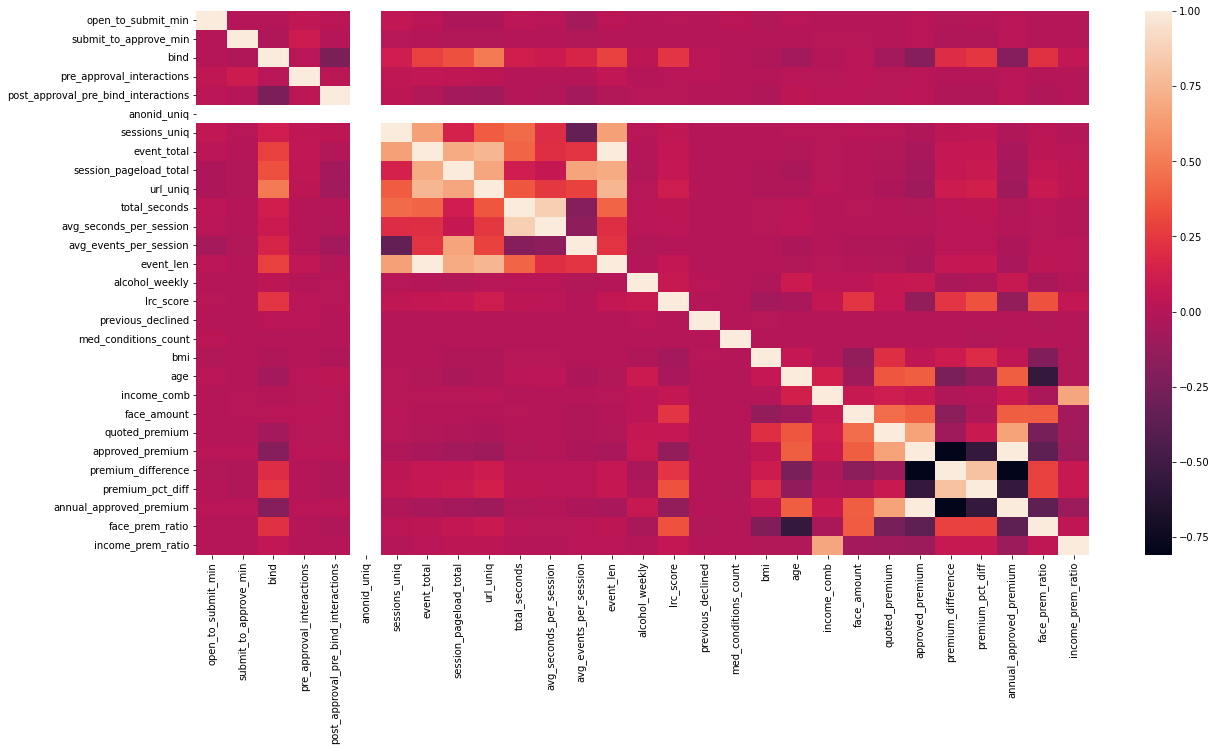

In [55]:
df_num = df.select_dtypes(include='number')
corr_mat = df_num.corr()

import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
sn.heatmap(corr_mat, annot=False)
plt.show()

There are a few observations:
- bind and face amount should all be categorical variables
- anonid_unique has something weird going on that we need at more closely
- sessions_uniq, event_total, session_pageload_total, url_uniq, total_seconds, avg_seconds_per_session, avg_events_per session, and event_len all seem highly correlated and we probably don't need all of them
- approved_premium and annual_approved_premium are highly correlated (as should be expected) and we don't need both

In [56]:
# make bind, face amount and term length categorical variables
df['bind'] = pd.Categorical(df.bind)
df['face_amount'] = pd.Categorical(df.face_amount)

In [57]:
df_num['anonid_uniq'].unique()

array([nan,  1.])

In [58]:
# there is no variation is this field, so we will remove it
df.drop(columns = 'anonid_uniq', axis=1, inplace=True)

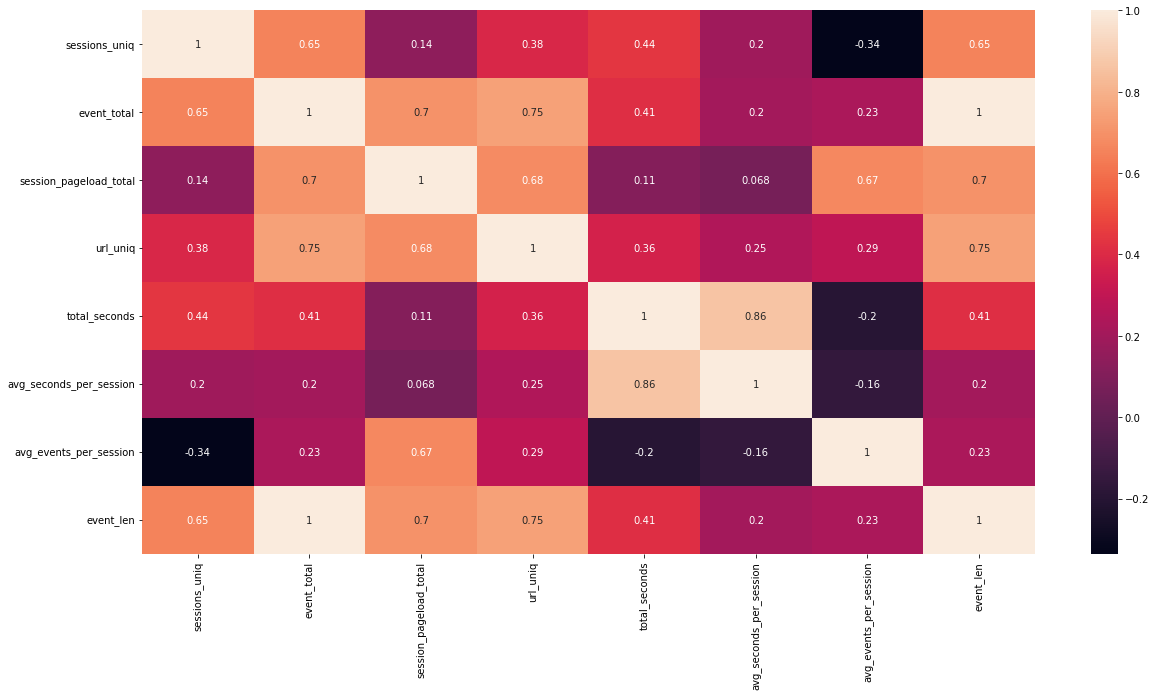

In [59]:
# create a separate datframe for user action metrics and investigate the correlations
actions = df[['sessions_uniq', 'event_total', 'session_pageload_total', 'url_uniq', 'total_seconds', 
              'avg_seconds_per_session', 'avg_events_per_session', 'event_len']]

corr_mat = actions.corr()

import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
sn.heatmap(corr_mat, annot=True)
plt.show()

In [60]:
# event_total and event_len are perfectly correlated, so we will remove one of them
# total_seconds and avg_seconds_per_session are also highly correlated.  As the correlations of avg_seconds_per_session
# is closer to 0 for the variables in this group, we will retain that variable
df.drop(columns = ['event_len', 'total_seconds'], axis=1, inplace=True)

In [61]:
# since approved_premium and annual_approved_premium are highly correlated, we remove the former
df.drop('approved_premium', axis=1, inplace=True)

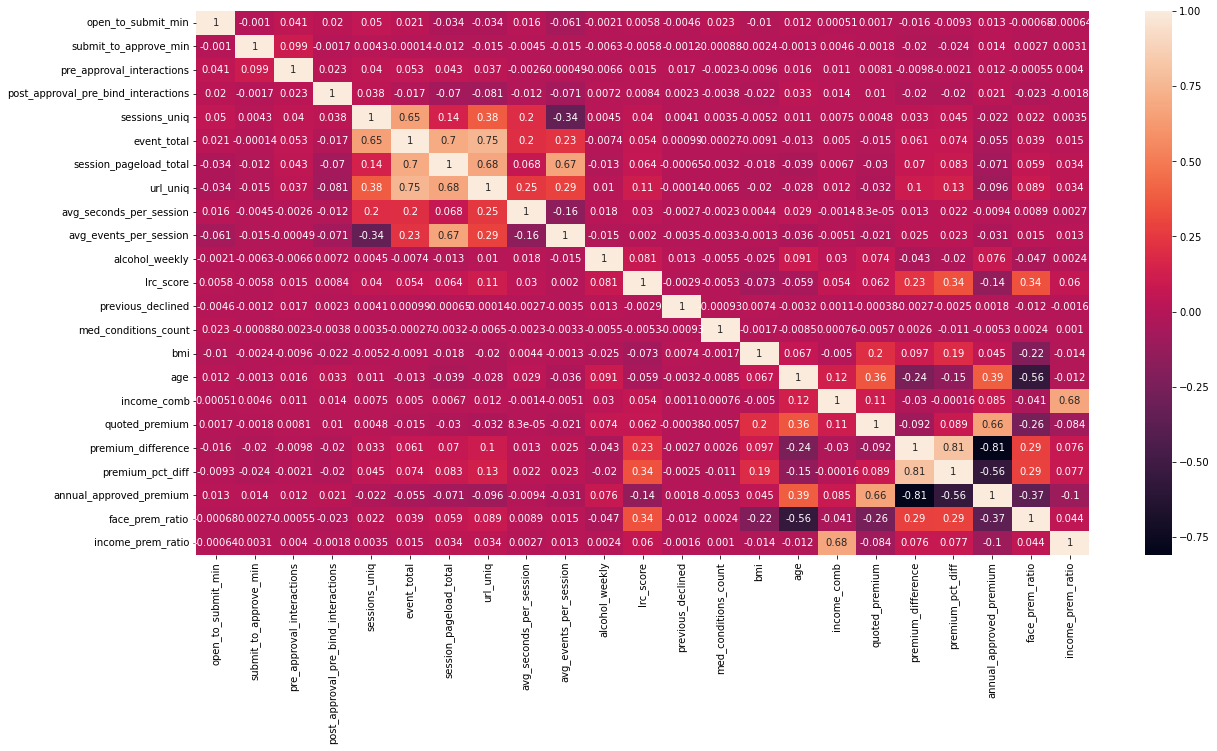

In [62]:
# we take another look at the correlation matrix for the numerical variables
df_num = df.select_dtypes(include='number')
corr_mat = df_num.corr()

import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
sn.heatmap(corr_mat, annot=True)
plt.show()

In [63]:
df.dtypes

application_id                           object
open_to_submit_min                        int64
submit_to_approve_min                     int64
channel_combined                         object
open_date                                object
bind                                   category
pre_approval_interactions                 int64
post_approval_pre_bind_interactions       int64
sessions_uniq                           float64
event_total                             float64
session_pageload_total                  float64
url_uniq                                float64
device                                   object
device_name                              object
avg_seconds_per_session                 float64
avg_events_per_session                  float64
gender                                   object
tb                                         bool
current_ins                              object
rx_result                                object
employment_status                       

In [64]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

,application_id,channel_combined,open_date,bind,device,device_name,gender,tb,current_ins,rx_result,...,postal_code_address,income_payment_period,disability_pmts,created_at,business_line,quote_id,face_amount,product,quoted_risk_class,approved_risk_class
0,046e7c9f-572b-4a58-82f2-3157295c182b,Other,2021-12-31,0,NaN,NaN,male,False,no,30101010,...,95479,weekly,False,2021-12-31,direct,bf8df768-3601-4399-aec2-6c74b880487f,1000000,BT2004,select_nt,essential_nt
1,6b381417-6906-4855-a804-9d8487d85bef,Other,2021-03-16,1,NaN,NaN,female,False,no,10101010,...,35147,biweekly,False,2021-03-16,direct,91b44e57-2876-42c7-86a3-6843486fcc49,700000,BT1504,elite_nt,preferred_nt
2,74b45874-1f97-433a-8d83-a1e3b3cbc2f2,Other,2021-04-06,1,NaN,NaN,female,False,no,10101010,...,27616,weekly,False,2021-04-06,direct,36d3a3ff-6920-4fca-b34d-1725f9329b13,500000,BT2004,elite_nt,preferred_nt
3,dbe73bbe-fd1e-40ab-bef2-674374fcb74a,Other,2021-06-07,0,NaN,NaN,male,False,no,10101010,...,20607,semimonthly,False,2021-06-07,direct,3ec19dd0-5be1-4989-a9e1-5d387f00f596,750000,BT3004,select_nt,select_nt
4,acaacde0-e3c0-4bb5-8e1f-402bb9e7e176,Other,2021-09-27,0,NaN,NaN,female,False,no,30101010,...,90063,monthly,False,2021-09-27,direct,80efd848-5c23-4625-93ca-8ca47f5292d4,700000,BT3004,elite_nt,select_nt


In [65]:
df_cat.isnull().sum()

application_id              0
channel_combined            0
open_date                   0
bind                        0
device                   2943
device_name              2943
gender                      0
tb                          0
current_ins                 0
rx_result                5035
employment_status           0
postal_code_address         0
income_payment_period       0
disability_pmts             0
created_at                  0
business_line               0
quote_id                    0
face_amount                 0
product                     0
quoted_risk_class           0
approved_risk_class         0
dtype: int64

A few observations:
- open_date and created_at both refer to the date when the application was started
- quote_id is not needed - we already have application id as a unique identifier
- look more closely at rx_result

In [66]:
dates = df[['application_id', 'open_date', 'created_at']]
dates['agree'] = dates.apply(lambda x: 'yes' if x.open_date == x.created_at else 'no', axis=1)
dates[dates['agree']=='yes'].shape[0]/dates.shape[0]

C:\Users\milan\AppData\Local\Temp/ipykernel_1580/1174871752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['agree'] = dates.apply(lambda x: 'yes' if x.open_date == x.created_at else 'no', axis=1)


1.0

In [67]:
#  since they are always the same, I will remove one, as well as quote id
df.drop(['created_at', 'quote_id'],axis=1, inplace=True)

In [68]:
df['rx_result'].unique()

array(['30101010', '10101010', '30301010', '30303010', 'N', nan],
      dtype=object)

In [69]:
df['rx_result'].value_counts()

10101010    24280
30101010     6486
30301010     3499
30303010     3428
N            2116
Name: rx_result, dtype: int64

Although I'm unsure what these field values mean, the rx_result field refers to the user's medical status so I think it should be included

In [70]:
# current feature count
df.shape

(44844, 42)

In [71]:
df_cat = df.select_dtypes(exclude = 'number')

df_cat_list = df_cat.columns.to_list()
for i in range(len(df_cat_list)):
    print (df_cat_list[i])
    print (df_cat[df_cat_list[i]].nunique())

application_id
41777
channel_combined
1172
open_date
599
bind
2
device
7
device_name
13
gender
2
tb
2
current_ins
2
rx_result
5
employment_status
7
postal_code_address
12523
income_payment_period
6
disability_pmts
2
business_line
2
face_amount
30
product
5
quoted_risk_class
6
approved_risk_class
9


It appears that we may have some duplicate application id's

### Removing duplicates

In [135]:
apps = df.groupby('application_id')['open_date'].count().reset_index()
apps.rename(columns = {'open_date':'count'}, inplace=True)

dupes = apps[apps['count'] > 1]
dupes[dupes['count'] > 2]

,application_id,count
4004,1956b67a-a996-4c8d-9090-8fb51a7e20a5,3
4417,1bdcc4ac-2681-44df-87f2-7ab41d7ffe59,6
6338,27c73f19-da2c-42c3-a1eb-095ab5fc1797,3
7645,2fc4a0ce-3fc5-4ece-a768-afb4f765acc4,3
9364,3a117a8d-d046-4d3a-9f4f-573cc084dde1,3
14983,5bf1ccde-7f94-4b10-aaae-17628a424ac1,4
15702,6053bf42-31d8-454a-b23f-d33d708ae0a5,4
18264,6fcd9061-7ae3-4092-9382-536c84304e0b,3
18495,71312ca9-485d-4e9b-8e30-cfacfebb35ce,4
18562,719b8de7-0746-4d51-a5b1-d6d76e328333,4


In [136]:
# we have 3038 application ids that appear in our data more than once
dupes.shape

(3038, 2)

In [137]:
# this is a total of 6105 observations
dupes['count'].sum()

6105

In [138]:
# it appears that each observation is the same except for business line
# to test this hypothesis, I drop the business line field and then drop duplicates
dupes_all = pd.merge(dupes, df, on='application_id', how = 'left')
print(dupes_all.shape)
dupes_all.drop('business_line', axis=1, inplace=True)
print(dupes_all.shape)

no_dupes = dupes_all.drop_duplicates()
no_dupes.shape
# the number of application ids goes down to 3251, meaning that for most of the duplicates, 
# business line was the only difference

(6105, 43)
(6105, 42)


(3251, 42)

In [139]:
# now we look at the remaining duplicates
dupes2 = no_dupes.groupby('application_id')['open_date'].count().reset_index()
dupes2 = dupes2[dupes2['open_date'] > 1]

In [77]:
dupes_all2 = pd.merge(dupes2, df, on = 'application_id', how = 'left')
dupes_all2
# for these applications, the only difference seems to be face value and premium

,application_id,open_date_x,open_to_submit_min,submit_to_approve_min,channel_combined,open_date_y,bind,pre_approval_interactions,post_approval_pre_bind_interactions,sessions_uniq,...,face_amount,product,quoted_risk_class,approved_risk_class,quoted_premium,premium_difference,premium_pct_diff,annual_approved_premium,face_prem_ratio,income_prem_ratio
0,0143fe9a-6362-472c-a634-c7cb2e7a1197,2,4,1,Experian,2021-10-30,1,0,0,2.0,...,350000,BT1504,select_nt,select_nt,116.25,0.00,0.000000,1395.00,250.896057,124.731183
1,0143fe9a-6362-472c-a634-c7cb2e7a1197,2,4,1,Experian,2021-10-30,1,0,0,2.0,...,250000,BT1504,select_nt,select_nt,84.75,0.00,0.000000,1017.00,245.821042,171.091445
2,0244245a-8dbf-4f95-a9fd-e31e49822cc4,2,5,2,Assurance,2021-07-01,0,0,0,1.0,...,500000,BT3004,essential_nt,essential_nt,94.33,0.00,0.000000,1131.96,441.711721,27.562811
3,0244245a-8dbf-4f95-a9fd-e31e49822cc4,2,5,2,Assurance,2021-07-01,0,0,0,1.0,...,350000,BT3004,essential_nt,essential_nt,69.88,0.00,0.000000,838.56,417.382179,37.206640
4,029e0506-803d-4ef3-a888-98a4bce20a46,2,3,1,Experian,2021-07-23,0,0,0,1.0,...,950000,BT2004,preferred_nt,essential_nt,166.71,-216.12,-1.296383,4593.96,206.793268,48.977353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,fddb36d6-461e-485b-a5da-3a8594a8c8b7,2,6,1,Assurance,2021-06-01,0,0,1,1.0,...,950000,BT2004,select_nt,select_nt,198.38,0.00,0.000000,2380.56,399.065766,65.530799
431,fe3fc878-4cd3-4c58-a8b5-ea0b7bc24333,2,8,1,Assurance,2021-04-15,0,0,1,1.0,...,600000,BT2004,elite_nt,select_nt,48.50,-44.50,-0.917526,1116.00,537.634409,281.992832
432,fe3fc878-4cd3-4c58-a8b5-ea0b7bc24333,2,8,1,Assurance,2021-04-15,0,0,1,1.0,...,1000000,BT2004,elite_nt,select_nt,76.83,-74.17,-0.965378,1812.00,551.876380,173.677704
433,ffb49b02-b549-4b0a-83ee-08c7e971a14d,2,1,2,Buzzery,2021-02-06,0,0,0,1.0,...,600000,BT2004,elite_nt,essential_nt,24.50,-36.50,-1.489796,732.00,819.672131,42.622951


In [140]:
dupes_all2.shape

(435, 43)

There are 435 application ids here, and I think we need to drop these since we don't know which one is correct. That is, if face value and premium have predictive power regarding whether or not a user will be bind, then we need to be sure that the data is correct so as not to introduce noise.  As we have no way of verifying which one is correct, we need to leave both of them out.

In [141]:
# to drop the duplicates, first we drop the application ids in the dupes_all2 dataframe
dupe_ids = dupes_all2[['application_id']]
dupe_ids.drop_duplicates(inplace=True)
dupe_ids['dupe'] = 'yes'
deduped = pd.merge(df, dupe_ids, on='application_id', how = 'left')
deduped.head(50)

C:\Users\milan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\milan\AppData\Local\Temp/ipykernel_1580/897808174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupe_ids['dupe'] = 'yes'


,application_id,open_to_submit_min,submit_to_approve_min,channel_combined,open_date,bind,pre_approval_interactions,post_approval_pre_bind_interactions,sessions_uniq,event_total,...,product,quoted_risk_class,approved_risk_class,quoted_premium,premium_difference,premium_pct_diff,annual_approved_premium,face_prem_ratio,income_prem_ratio,dupe
0,046e7c9f-572b-4a58-82f2-3157295c182b,6,1,Other,2021-12-31,0,0,0,NaN,NaN,...,BT2004,select_nt,essential_nt,251.00,-151.67,-0.604263,4832.04,206.951929,37.665251,NaN
1,6b381417-6906-4855-a804-9d8487d85bef,5,1,Other,2021-03-16,1,0,0,NaN,NaN,...,BT1504,elite_nt,preferred_nt,30.50,-9.33,-0.305902,477.96,1464.557704,110.155662,NaN
2,74b45874-1f97-433a-8d83-a1e3b3cbc2f2,8,1,Other,2021-04-06,1,0,0,NaN,NaN,...,BT2004,elite_nt,preferred_nt,19.75,-5.42,-0.274430,302.04,1655.409879,127.744670,NaN
3,dbe73bbe-fd1e-40ab-bef2-674374fcb74a,4,1,Other,2021-06-07,0,1,0,NaN,NaN,...,BT3004,select_nt,select_nt,84.75,0.00,0.000000,1017.00,737.463127,54.277286,NaN
4,acaacde0-e3c0-4bb5-8e1f-402bb9e7e176,2,1,Other,2021-09-27,0,3,0,NaN,NaN,...,BT3004,elite_nt,select_nt,50.33,-32.09,-0.637592,989.04,707.757017,79.737928,NaN
5,d26806a0-439d-4211-acc5-ffbdd0c59198,3,1,Other,2021-03-27,0,1,0,NaN,NaN,...,BT2004,elite_nt,select_nt,26.00,-15.00,-0.576923,492.00,1016.260163,148.373984,NaN
6,043045f6-fb44-4333-8d25-abe714206422,5,1,Other,2021-07-24,1,0,0,NaN,NaN,...,BT1504,elite_nt,elite_nt,62.00,0.00,0.000000,744.00,940.860215,279.569892,NaN
7,c03d9e54-6faf-465c-a7f9-57bd203cb662,6,1,Other,2022-03-26,0,0,0,NaN,NaN,...,BT1504,elite_nt,essential_nt,46.25,-63.75,-1.378378,1320.00,227.272727,40.000000,NaN
8,f616b18f-7357-4f28-9ebf-019467211b0d,3,0,Other,2022-03-12,1,0,0,NaN,NaN,...,BT2004,elite_nt,select_nt,51.83,-46.67,-0.900444,1182.00,423.011844,32.554992,NaN
9,064c4bb6-9c0b-4f6e-aef9-bb490c62b302,11,1,Other,2021-07-15,1,0,0,NaN,NaN,...,BT3004,elite_nt,preferred_nt,39.33,-10.42,-0.264938,597.00,837.520938,140.703518,NaN


In [142]:
deduped = deduped[deduped['dupe'].isnull()]

In [143]:
print(df.shape)
print(deduped.shape)

(44844, 42)
(44409, 43)


In [145]:
df = deduped.drop('dupe', axis=1)

Now we remove the duplicates by business line

In [146]:
dupes_all = pd.merge(dupes, df, on='application_id', how = 'left')
dupes_all[['application_id', 'channel_combined', 'business_line','bind', 'face_amount', 'product', 'annual_approved_premium']].head(50)

,application_id,channel_combined,business_line,bind,face_amount,product,annual_approved_premium
0,0017cb58-af56-4fb7-b212-08c3cbfee7ed,IMO.librainsurancepartnersllc.BGA.eugenecoheni...,advisor,0,450000,BT1004,855.00
1,0017cb58-af56-4fb7-b212-08c3cbfee7ed,IMO.librainsurancepartnersllc.BGA.eugenecoheni...,direct,0,450000,BT1004,855.00
2,003e827d-f1a6-4c0f-bda5-ea47a58cafaa,IMO.tma.BGA.zanderins.AGENT.marketing,advisor,0,1000000,BT2004,492.00
3,003e827d-f1a6-4c0f-bda5-ea47a58cafaa,IMO.tma.BGA.zanderins.AGENT.marketing,direct,0,1000000,BT2004,492.00
4,0063ab29-94b8-498f-a905-e646e99c7447,IMO.aimcor.BGA.lifequotesinc,advisor,0,1000000,BT2004,632.04
5,0063ab29-94b8-498f-a905-e646e99c7447,IMO.aimcor.BGA.lifequotesinc,direct,0,1000000,BT2004,632.04
6,006c9f80-b354-44c0-b598-6ebdb7ee165b,IMO.aimcor.BGA.aipmarketing.AGENCY.custombenef...,direct,1,200000,BT3004,204.00
7,006c9f80-b354-44c0-b598-6ebdb7ee165b,IMO.aimcor.BGA.aipmarketing.AGENCY.custombenef...,advisor,1,200000,BT3004,204.00
8,0073b855-a124-46b0-a7c6-6624572a6872,IMO.tma.BGA.zanderins,direct,1,1100000,BT2004,369.00
9,0073b855-a124-46b0-a7c6-6624572a6872,IMO.tma.BGA.zanderins,advisor,1,1100000,BT2004,369.00


In [117]:
# we want to keep the applications where the business line is advisor and the channel is an agent
# we start with all of our duplicates, and then identify those with advisor and agent
# agents can be identified in channel as starting with 'IMO' or 'BGA' so we create a new field for the first 
# three characters of the channel_combined field
dupes_all['channel_abb'] = dupes_all['channel_combined'].str[:3]
dupes_all.head()

,application_id,count,open_to_submit_min,submit_to_approve_min,channel_combined,open_date,bind,pre_approval_interactions,post_approval_pre_bind_interactions,sessions_uniq,...,product,quoted_risk_class,approved_risk_class,quoted_premium,premium_difference,premium_pct_diff,annual_approved_premium,face_prem_ratio,income_prem_ratio,channel_abb
0,0017cb58-af56-4fb7-b212-08c3cbfee7ed,2,4,0,IMO.librainsurancepartnersllc.BGA.eugenecoheni...,2022-03-11,0,0,0,1.0,...,BT1004,elite_nt,select_nt,44.63,-26.62,-0.596460,855.00,526.315789,179.649123,IMO
1,0017cb58-af56-4fb7-b212-08c3cbfee7ed,2,4,0,IMO.librainsurancepartnersllc.BGA.eugenecoheni...,2022-03-11,0,0,0,1.0,...,BT1004,elite_nt,select_nt,44.63,-26.62,-0.596460,855.00,526.315789,179.649123,IMO
2,003e827d-f1a6-4c0f-bda5-ea47a58cafaa,2,4,1,IMO.tma.BGA.zanderins.AGENT.marketing,2022-01-31,0,0,0,1.0,...,BT2004,elite_nt,elite_nt,41.00,0.00,0.000000,492.00,2032.520325,142.276423,IMO
3,003e827d-f1a6-4c0f-bda5-ea47a58cafaa,2,4,1,IMO.tma.BGA.zanderins.AGENT.marketing,2022-01-31,0,0,0,1.0,...,BT2004,elite_nt,elite_nt,41.00,0.00,0.000000,492.00,2032.520325,142.276423,IMO
4,0063ab29-94b8-498f-a905-e646e99c7447,2,4,0,IMO.aimcor.BGA.lifequotesinc,2022-05-23,0,0,0,2.0,...,BT2004,elite_nt,select_nt,27.67,-25.00,-0.903506,632.04,1582.178343,NaN,IMO


In [118]:
# we identify observations that are attributed to the direct business line but come from an advisor channel
# these are the observations that we want to remove
agents = dupes_all[(dupes_all['business_line'] == 'direct') & ((dupes_all['channel_abb'] == 'IMO') | (dupes_all['channel_abb'] == 'BGA'))]
agents.shape

(2850, 44)

In [147]:
# check number of observations before removing
df.shape

(44409, 42)

In [148]:
agent_apps = agents[['application_id','business_line']]
agent_apps['dupes'] = 'yes'
agent_apps.head()

C:\Users\milan\AppData\Local\Temp/ipykernel_1580/1534584819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_apps['dupes'] = 'yes'


,application_id,business_line,dupes
1,0017cb58-af56-4fb7-b212-08c3cbfee7ed,direct,yes
3,003e827d-f1a6-4c0f-bda5-ea47a58cafaa,direct,yes
5,0063ab29-94b8-498f-a905-e646e99c7447,direct,yes
6,006c9f80-b354-44c0-b598-6ebdb7ee165b,direct,yes
8,0073b855-a124-46b0-a7c6-6624572a6872,direct,yes


In [149]:
deduped = pd.merge(df, agent_apps, on=['application_id','business_line'], how = 'left')
deduped.head()

,application_id,open_to_submit_min,submit_to_approve_min,channel_combined,open_date,bind,pre_approval_interactions,post_approval_pre_bind_interactions,sessions_uniq,event_total,...,product,quoted_risk_class,approved_risk_class,quoted_premium,premium_difference,premium_pct_diff,annual_approved_premium,face_prem_ratio,income_prem_ratio,dupes
0,046e7c9f-572b-4a58-82f2-3157295c182b,6,1,Other,2021-12-31,0,0,0,NaN,NaN,...,BT2004,select_nt,essential_nt,251.00,-151.67,-0.604263,4832.04,206.951929,37.665251,NaN
1,6b381417-6906-4855-a804-9d8487d85bef,5,1,Other,2021-03-16,1,0,0,NaN,NaN,...,BT1504,elite_nt,preferred_nt,30.50,-9.33,-0.305902,477.96,1464.557704,110.155662,NaN
2,74b45874-1f97-433a-8d83-a1e3b3cbc2f2,8,1,Other,2021-04-06,1,0,0,NaN,NaN,...,BT2004,elite_nt,preferred_nt,19.75,-5.42,-0.274430,302.04,1655.409879,127.744670,NaN
3,dbe73bbe-fd1e-40ab-bef2-674374fcb74a,4,1,Other,2021-06-07,0,1,0,NaN,NaN,...,BT3004,select_nt,select_nt,84.75,0.00,0.000000,1017.00,737.463127,54.277286,NaN
4,acaacde0-e3c0-4bb5-8e1f-402bb9e7e176,2,1,Other,2021-09-27,0,3,0,NaN,NaN,...,BT3004,elite_nt,select_nt,50.33,-32.09,-0.637592,989.04,707.757017,79.737928,NaN


In [150]:
deduped = deduped[deduped['dupes'].isnull()]
deduped.shape

(41578, 43)

In [151]:
df = deduped.drop('dupes', axis=1)
df.shape

(41578, 42)

In [163]:
df_cat = df.select_dtypes(exclude = 'number')

In [164]:
df_cat_list = df_cat.columns.to_list()
for i in range(len(df_cat_list)):
    print (df_cat_list[i])
    print (df_cat[df_cat_list[i]].nunique())

application_id
41574
channel_combined
1172
open_date
599
bind
2
device
7
device_name
13
gender
2
tb
2
current_ins
2
rx_result
5
employment_status
7
postal_code_address
12504
income_payment_period
6
disability_pmts
2
business_line
2
face_amount
30
product
5
quoted_risk_class
6
approved_risk_class
9


In [204]:
cat_list = [
 'device_name',
 'gender',
 'tb',
 'current_ins',
 'rx_result',
 'employment_status',
 'income_payment_period',
 'disability_pmts',
 'business_line',
 'product',
 'quoted_risk_class',
 'approved_risk_class']

# plotting bind and face amount separately
# removing device from the data framedue to overlap with device_name

In [205]:
len(cat_list)

13

Text(0, 0.5, 'Count of Users')

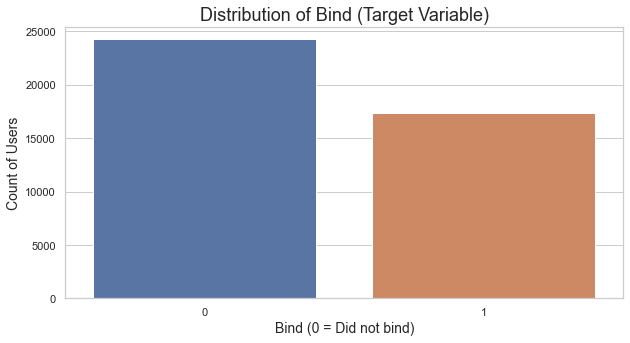

In [206]:
import matplotlib.pyplot as plt

import seaborn as sns

bind = df_cat.groupby('bind')['application_id'].count().reset_index()
bind.rename(columns = {'application_id':'count'}, inplace=True)

plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data = bind, x = 'bind', y = 'count')
plt.title('Distribution of Bind (Target Variable)', size = 18)
plt.xlabel('Bind (0 = Did not bind)', size = 14)
plt.ylabel('Count of Users', size = 14)

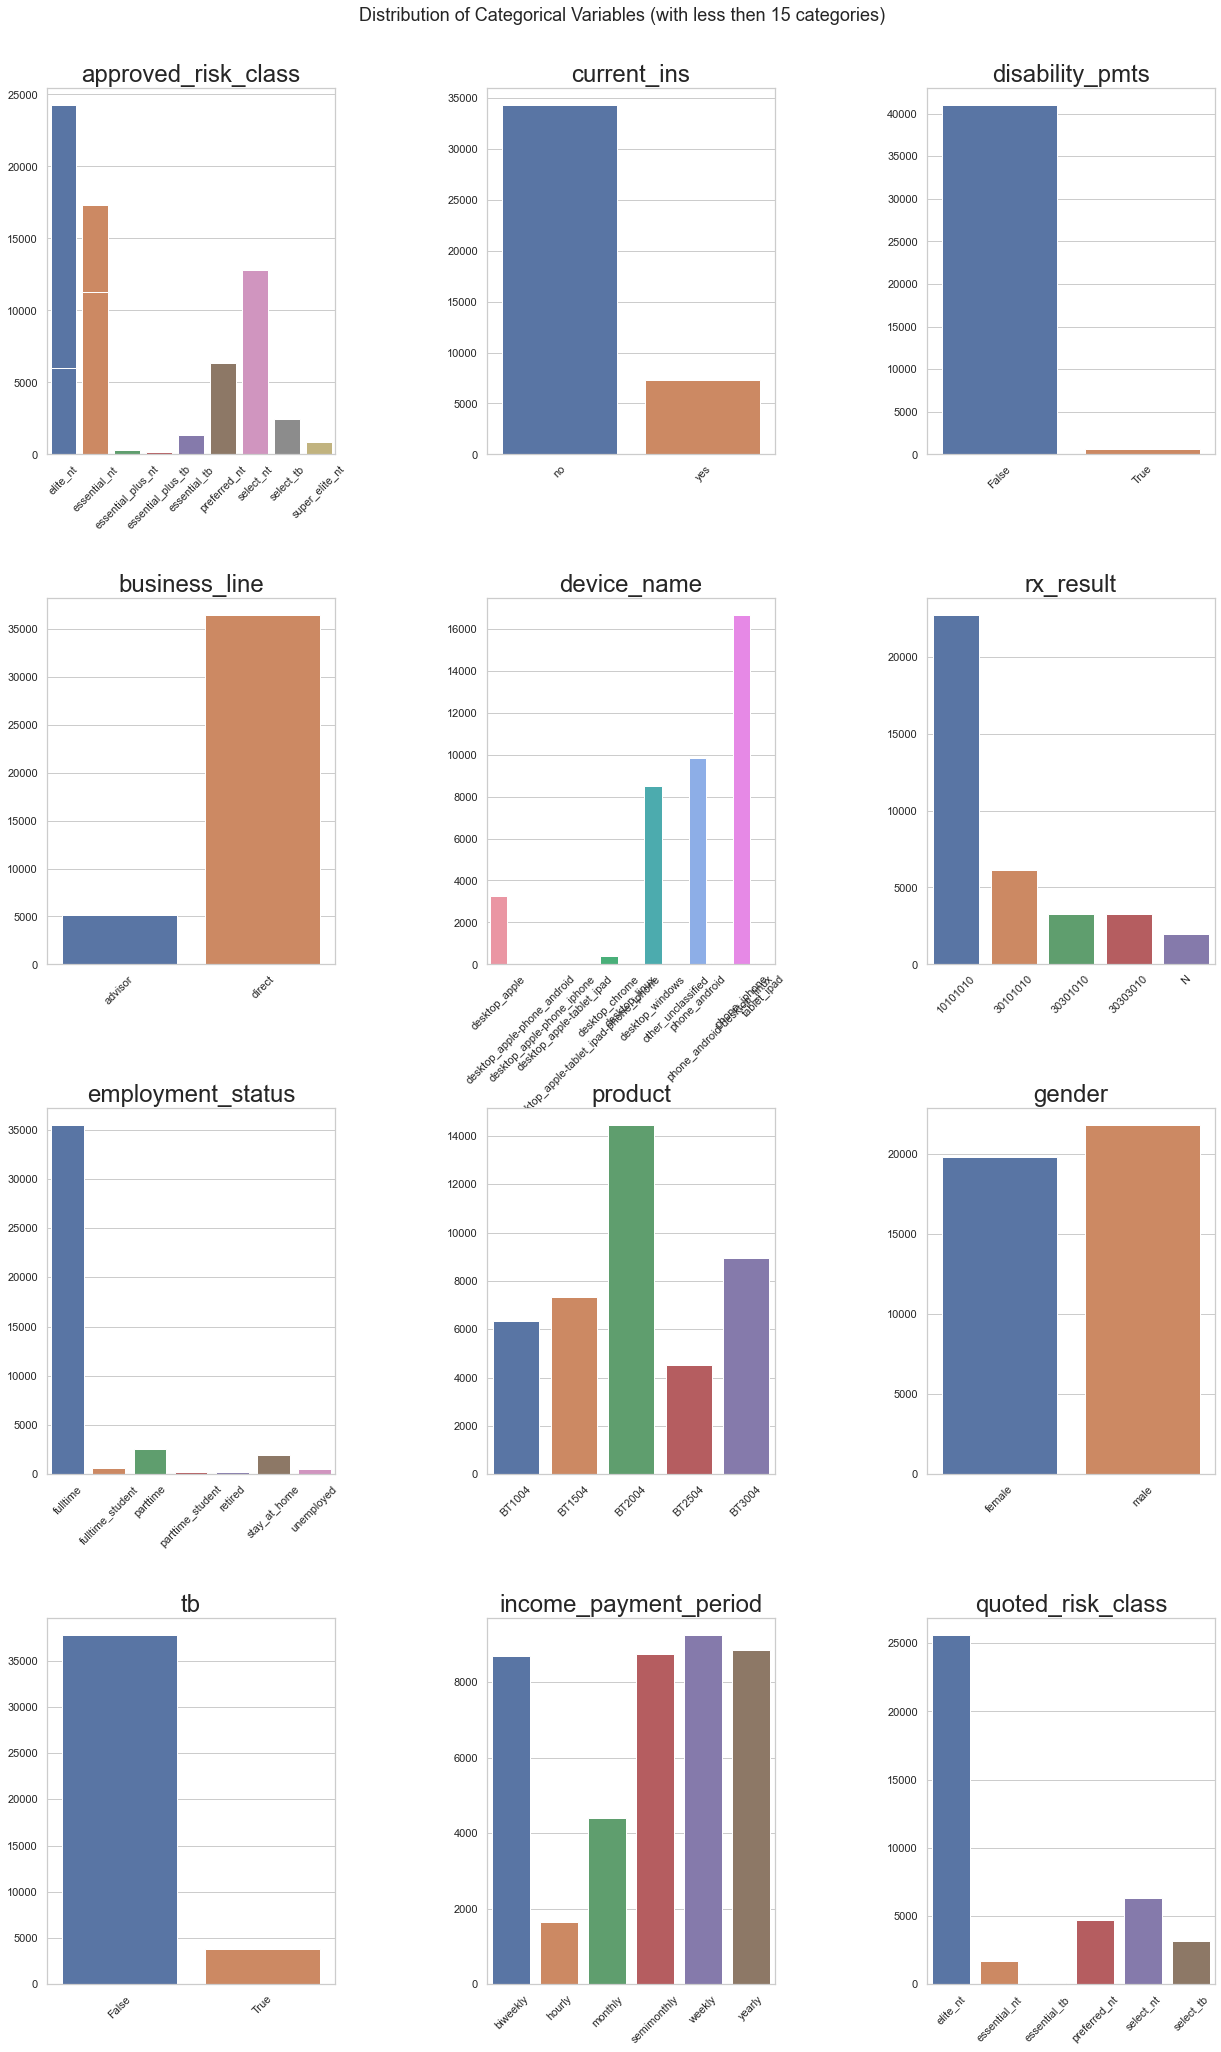

In [228]:
import matplotlib.pyplot as plt

import seaborn as sns

fig, axes = plt.subplots(4, 3, figsize=(20, 30), sharey=False)
fig.tight_layout(pad=10.0)

for i in range(len(cat_list)):
    j = i % 4
    k = i % 3

    plot_df = df_cat[[cat_list[i],'application_id']].groupby(cat_list[i])['application_id'].count().reset_index()
    plot_df.rename(columns = {'application_id':'count'}, inplace=True)

    fig.suptitle('Distribution of Categorical Variables (with less then 15 categories)', size = 18)
 
    sns.set(style='whitegrid')
    sns.barplot(ax=axes[j,k], data=plot_df,  x= cat_list[i], y = 'count')

    axes[j,k].set_title(cat_list[i], size = 24)
    axes[j,k].set_ylabel('')
    axes[j,k].set_xlabel('')
    axes[j,k].tick_params(axis='x', rotation=45)
    
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '50000'),
  Text(1, 0, '100000'),
  Text(2, 0, '150000'),
  Text(3, 0, '200000'),
  Text(4, 0, '250000'),
  Text(5, 0, '300000'),
  Text(6, 0, '350000'),
  Text(7, 0, '400000'),
  Text(8, 0, '450000'),
  Text(9, 0, '500000'),
  Text(10, 0, '550000'),
  Text(11, 0, '600000'),
  Text(12, 0, '650000'),
  Text(13, 0, '700000'),
  Text(14, 0, '750000'),
  Text(15, 0, '800000'),
  Text(16, 0, '850000'),
  Text(17, 0, '900000'),
  Text(18, 0, '950000'),
  Text(19, 0, '1000000'),
  Text(20, 0, '1050000'),
  Text(21, 0, '1100000'),
  Text(22, 0, '1150000'),
  Text(23, 0, '1200000'),
  Text(24, 0, '1250000'),
  Text(25, 0, '1300000'),
  Text(26, 0, '1350000'),
  Text(27, 0, '1400000'),
  Text(28, 0, '1450000'),
  Text(29, 0, '1500000')])

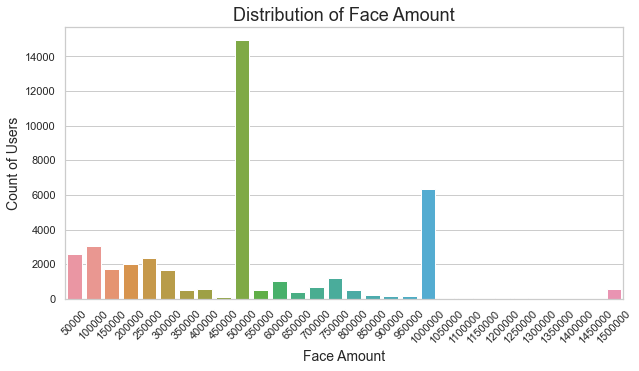

In [229]:
import matplotlib.pyplot as plt

import seaborn as sns

face = df_cat.groupby('face_amount')['application_id'].count().reset_index()
face.rename(columns = {'application_id':'count'}, inplace=True)

plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data = bind, x = 'face_amount', y = 'count')
plt.title('Distribution of Face Amount', size = 18)
plt.xlabel('Face Amount', size = 14)
plt.ylabel('Count of Users', size = 14)
plt.xticks(rotation = 45)

In [224]:
# It appears that the most popular face amount is $500k followed by $1M.

In [230]:
df.drop('device', inplace=True)

KeyError: "['device'] not found in axis"

In [231]:
# save the cleaned dataframe for use in modeling
df.to_csv(r'C:\Users\milan\Documents\GitHub\DSC-630-Project\clean_df.csv')